# Problem korków drogowych

Wszyscy znamy zjawisko spowolnienia ruchu na autostradzie w godzinach szczytu, gdy liczba poruszajacych się samochodow rośnie gwałtownie. Wiekszość z nas uważa, ze zjawisko to utrudnia ruch; jestesmy przekonani, ze samochody mogłyby poruszac sie szybciej. Czy tak jest w istocie? Rozważymy ten problem z punktu widzenia fizyki.

1. Przyjmujemy, ze samochody poruszaja sie jeden za drugim z identyczna predkoscia $v$.
2. Przyjmijmy, ze wszystkie poruszajace samochody sa identyczne i maja dlugosc $L0$. 
3. Przyjmijmy, ze siedzacy w nich kierowcy maja ten sam czas reakcji $TR$. 
4. Przyjmijmy, ze kierowcy utrzymuja miedzy samochodami identyczna, bezpieczna odleglosc $Db$ (mierzona od przednmiego zderzaka samochodu poruszajacego sie z tylu do tylniego zderzaka samochodu poruszajacego sie z przodu). Odleglosc ta rowna jest sumie dwu składnikow: $Dr$ i $Dh$. $Dr$ jest drogą reakcji, tzn. odległością, jaką samochód przejedzie, nim kierowca naciśnie pedał hamulca. Dh jest drogą hamowania, tzn. drogą, jaką samochod przejedzie od momentu naciśniecia hamulca do momentu zatrzymania samochodu. 
5. Przyjmujemy, ze wszystkie samochody hamują w równie efektywny sposob - przyśpieszenie (ujemne) jakiemu poddany jest samochod podczas hamowania wynosi $f \cdot g$, gdzie $f$ jest współczynnikiem tarcia między oponami a powierzchnią autostrady, a $g$ jest przyspieszeniem ziemskim.

Biorąc pod uwage określone wyżej założenia zdefiniuj wyrażenia opisujace:
1. Drogę reakcji $Dr$.
2. Drogę hamowania $Dh$ (znajdź czas $Th$, po którym prędkość spadnie do zera, a nastepnie oblicz drogę $Dh$ przebytą w tym czasie.)
3. Odległość bezpieczną $Db=Dr+Dh$.
4. Odleglość $Ds$ zajmowaną przez jeden samochód w poruszającej sie kolumnie $Ds=L0+Db$.
5. Określ $T$, z którym samochody przejeżdżają pewien nieruchomy punkt kontrolny.

Przyjmujac:
- $g=9.81~~ \rm{[m/s^2]}$,
- $f=0.5$,
- $TR=0.5~~ \rm{[s]}$,
- $L0=4~~ \rm{[m]}$,

6. Wykonaj wykres zalezności okresu T od predkości v.
7. Znajdź optymalną prędkość vopt, przy której przepustowość autostrady osiąga swe maksimum, to znaczy znajdź minimum zaleznosci $T(v)$. (W tym celu oblicz pochodną $dT/dv$ i znajdź tą wartość vopt, dla której pochodna ta równa jest 0).
8. Zbadaj, jak optymalna prędkość vopt zalezy od $f$, $TR$ i $L0$.
9. Zbadaj, jak okres T zależy od czasu reakcji kierowów TR.

WSKAZÓWKA: Najpierw podziel wielkości na funkcje i wartości (co będzie reprezentowane przez symbole, a co przez zmienne). Z treści zadania wynika, że symbolami będą v i T. Pozostałe wielkości można reprezentować za pomocą zmiennych numerycznych. Ale możemy też wszystko traktowac jako symbol!

In [1]:
import matplotlib.pyplot as plt
from sympy import *
from sympy.plotting import plot

### Obliczenia w m/s

In [2]:
T, v, L0, g, f, TR, Dr, ah, Th, Dh, Db, Ds, T, v = symbols('T v L0 g f TR Dr ah Th Dh Db Ds T v')

#### ad. 1: Określanie drogi reakcji (Dr)

In [3]:
Dr = v*TR
Dr

TR*v

#### ad. 2: Określanie drogi hamowania (Dh)

In [4]:
ah = f*g
ah

f*g

In [5]:
Th = v/ah
Th

v/(f*g)

In [6]:
Dh = v*Th - 0.5*ah*Th**2
Dh

0.5*v**2/(f*g)

#### ad. 3: Określanie drogi bezpiecznej (Db)

In [7]:
Db = Dr + Dh
Db

TR*v + 0.5*v**2/(f*g)

#### ad. 4: Określanie odległości zajmowanej przez jeden samochód (Ds)

In [8]:
Ds = L0 + Db
Ds

L0 + TR*v + 0.5*v**2/(f*g)

#### ad. 5: Określanie okresu mijania punktu kontrolnego przez kolejne samochody (T)

In [9]:
T = Ds/v
T

(L0 + TR*v + 0.5*v**2/(f*g))/v

In [10]:
T.subs([(L0, 3), (TR, 0.5), (f, 0.5), (g, 9.81)])

(0.101936799184506*v**2 + 0.5*v + 3)/v

#### ad. 6: Wykres zależności T(v) (w metrach na sekundę)

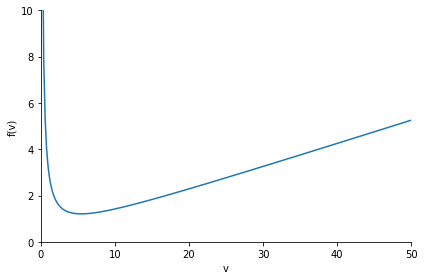

In [11]:
plot(T.subs([(L0, 3), (TR, 0.1), (f, 0.5), (g, 9.81)]), (v, 0, 50), xlim = [0, 50], ylim = [0, 10])

### Zamiana jednostek na km/h

In [12]:
T, v, L0, g, f, TR, Dr, ah, Th, Dh, Db, Ds, T, v, vkmh = symbols('T v L0 g f TR Dr ah Th Dh Db Ds T v vkmh')

In [13]:
v = vkmh*1000/3600
v

5*vkmh/18

In [14]:
Dr = v*TR
ah = f*g
Th = v/ah
Dh = v*Th - 0.5*ah*Th**2
Db = Dr + Dh
Ds = L0 + Db
T = Ds/v

In [15]:
T

18*(L0 + 5*TR*vkmh/18 + 0.0385802469135802*vkmh**2/(f*g))/(5*vkmh)

In [16]:
T_dependency = T.subs([(L0, 3), (TR, 0.5), (f, 0.5), (g, 9.81)])

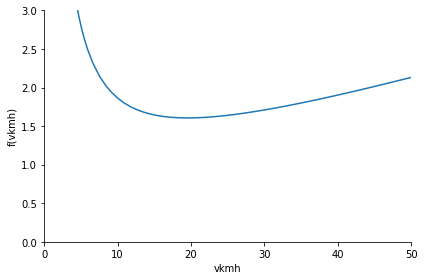

In [17]:
plot(T_dependency, (vkmh, 0, 50), xlim = [0, 50], ylim = [0, 3])

#### ad. 7: Wyznaczanie prędkości optymalnej (vopt)

In [18]:
Tprim = diff(T, vkmh)
Tprim

18*(5*TR/18 + 0.0771604938271605*vkmh/(f*g))/(5*vkmh) - 18*(L0 + 5*TR*vkmh/18 + 0.0385802469135802*vkmh**2/(f*g))/(5*vkmh**2)

In [19]:
Tprim = simplify(Tprim)

In [20]:
Tprim

-3.6*L0/vkmh**2 + 0.138888888888889/(f*g)

In [21]:
solve(Tprim, vkmh)

[-5.09116882454314*sqrt(L0*f*g), 5.09116882454314*sqrt(L0*f*g)]

In [22]:
vopt = solve(Tprim, vkmh)[1]
vopt

5.09116882454314*sqrt(L0*f*g)

In [23]:
vopt_value = round(N(vopt.subs([(L0, 3), (TR, 0.5), (f, 0.5), (g, 9.81)])), 4)
vopt_value

19.5298

#### ad. 8: Badanie zależności vopt od f, TR i L0

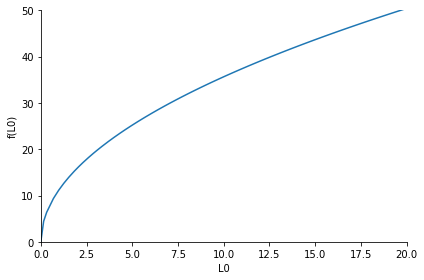

In [24]:
vopt_dependency = vopt.subs([(TR, 0.5), (f, 0.5), (g, 9.81)])
plot(vopt_dependency, (L0, 0, 20), xlim = [0, 20], ylim = [0, 50])

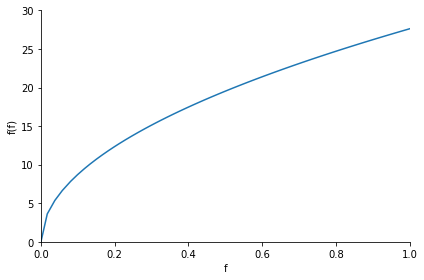

In [25]:
vopt_dependency = vopt.subs([(L0, 3), (TR, 0.5), (g, 9.81)])
plot(vopt_dependency, (f, 0, 1), xlim = [0, 1], ylim = [0, 30])

#### ad. 9: Badanie zależności T(v) dla różnych czasów reakcji (TR)

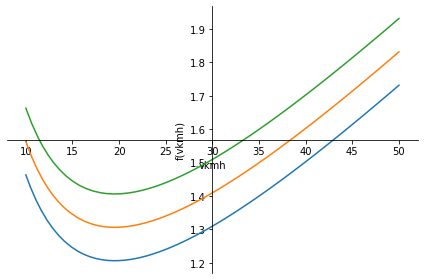

In [26]:
Td1 = T.subs([(L0, 3), (f, 0.5), (g, 9.81), (TR, 0.1)])
Td2 = T.subs([(L0, 3), (f, 0.5), (g, 9.81), (TR, 0.2)])
Td3 = T.subs([(L0, 3), (f, 0.5), (g, 9.81), (TR, 0.3)])
plot(Td1, Td2, Td3, (vkmh, 10, 50))